<h1 align="center">Text classification</h1>
<h2 align="center">Hotel Reviews from Chennai, India</h2>

In [1]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Loading ang exploring dataset</h3>

<p>The dataset is obtained from Kaggle.
   <br>The data is in the form of a csv file with over 4000 reviews. 
   <br>There are 5 columns:
   <br>Column 1: Name of the hotel 
   <br>Column 2: Title of the review 
   <br>Column 3: Text of the review 
   <br>Column 4: Sentiment of the review( 1: Negative 2:Average 3:Positive) - target feature
   <br>Column 5: Rating percentage
</p>

In [13]:
data = pd.read_csv('chennai_reviews.csv')

In [3]:
data.head(10)

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,NaN,Worst hotel I have ever encountered. I will ne...,1,20
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100
4,Accord Metropolitan,NaN,good hotel and staff Veg food good non veg bre...,3,100
5,Accord Metropolitan,NaN,Great hotel. The staff if welcoming. Helpful. ...,3,100
6,Accord Metropolitan,"Good location, excellent staff.","The hotel is mostly clean, but bathrooms need ...",3,80
7,Accord Metropolitan,convenient and awesome,Awesome hotel with all needed amenities and lu...,3,100
8,Accord Metropolitan,Comfort in the heart of Chennai,Very nice \nComfortable,3,100
9,Accord Metropolitan,Very Good Hotel in T Nagar,The staff of the hotel were polite. The brick...,3,80


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 5 columns):
Hotel_name           4768 non-null object
Review_Title         4341 non-null object
Review_Text          4768 non-null object
Sentiment            4768 non-null int64
Rating_Percentage    4768 non-null int64
dtypes: int64(2), object(3)
memory usage: 186.3+ KB


In [14]:
#Filling missing values in Review_Title with None 
data['Review_Title'] = data.Review_Title.fillna('None')
data.head()

,Hotel_name,Review_Title,Review_Text,Sentiment,Rating_Percentage
0,Accord Metropolitan,Excellent comfortableness during stay,Its really nice place to stay especially for b...,3,100
1,Accord Metropolitan,Not too comfortable,It seems that hotel does not check the basic a...,1,20
2,Accord Metropolitan,None,Worst hotel I have ever encountered. I will ne...,1,20
3,Accord Metropolitan,Best hotel,Had a good time in this hotel and the staff Ku...,3,100
4,Accord Metropolitan,None,good hotel and staff Veg food good non veg bre...,3,100


In [15]:
#Exploring target feature
data.Sentiment.value_counts()

3    3440
2     841
1     487
Name: Sentiment, dtype: int64

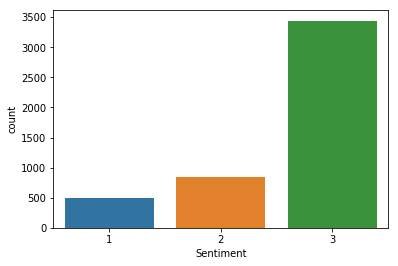

In [16]:
#Visualize target feature
sns.countplot(x = 'Sentiment', data = data)

<p>There are much more positive reviews than negatives.</p>

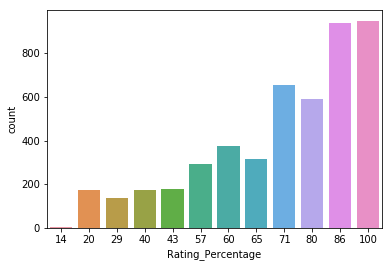

In [17]:
#Visualize Rating_Percentage feature
sns.countplot(x = 'Rating_Percentage', data = data)

<h3>Natural Language Processing. Text preparation</h3>

In [20]:
#Libraries for text cleaning
import re
import nltk
from nltk.stem.porter import PorterStemmer
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [19]:
# Cleaning the texts
corpus = []
for i in range(0,4768):
    review = re.sub('[^a-zA-Z]', ' ', data['Review_Text'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
corpus

['realli nice place stay especi busi tourist purpos',
 'seem hotel check basic amen room hand room travel phone room work creat problem hectic day travel would like relax work pace sent technician kept look fix hour get room chang',
 'worst hotel ever encount never think stay thii hotel futur',
 'good time hotel staff kumar aishwarya hous keep guy sure name peopl make stay pleasant happi day sure back place stay chennai good job guy',
 'good hotel staff veg food good non veg breakfast need improv',
 'great hotel staff welcom help alway',
 'hotel mostli clean bathroom need care first bathroom hot water second one took long time drain tub plu paint caulk peel wall plu point great restaur excel custom servic',
 'awesom hotel need amen luxuri friendli staff great food',
 'nice comfort',
 'staff hotel polit brick oven chef extrem help meal good room advertis clean stay day comfort would recommend hotel other',
 'overal pleasant stay veg restaur best experi decent price',
 'busi trip stay tw

Creating Bag of Words

In [22]:
#Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 4300)
X = cv.fit_transform(corpus).toarray()

In [23]:
X.shape

(4768, 4300)

Extraction of target values

In [25]:
y = data.iloc[:,3].values

<h3>Sentiment Analysis</h3>
<h5>Building classification models</h5>

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<h6>Naive Bayes model</h6>

In [27]:
# Fitting Naive Bayes classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

<h6>Evaluating results</h6>

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.05, 'Confusion matrix for Naive Bayes')

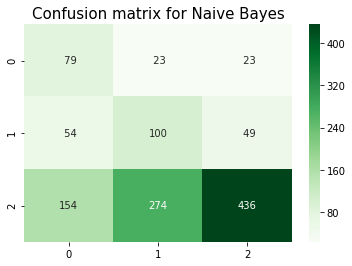

In [30]:
#Visualize the confution matrix
sns.heatmap(cm,annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion matrix for Naive Bayes', y=1.05, size=15)

There are a lot of confuses

In [32]:
#Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.28      0.63      0.38       125
           2       0.25      0.49      0.33       203
           3       0.86      0.50      0.64       864

   micro avg       0.52      0.52      0.52      1192
   macro avg       0.46      0.54      0.45      1192
weighted avg       0.69      0.52      0.56      1192



F1-score is quite low, so the classifier is not so good.

<h6>Random Forest model</h6>

In [33]:
# Fitting Random Forest classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

<h6>Evaluating results</h6>

In [35]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 1.05, 'Confusion matrix for Random Forest')

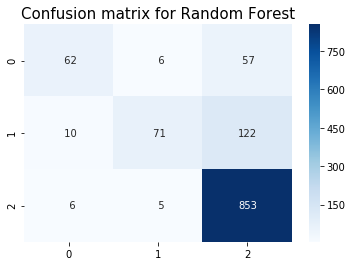

In [37]:
#Visualize the confution matrix
sns.heatmap(cm,annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion matrix for Random Forest', y=1.05, size=15)

In [38]:
#Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.79      0.50      0.61       125
           2       0.87      0.35      0.50       203
           3       0.83      0.99      0.90       864

   micro avg       0.83      0.83      0.83      1192
   macro avg       0.83      0.61      0.67      1192
weighted avg       0.83      0.83      0.80      1192



With Random Forest model f1-score is much better. The predicted values are 83% accurate.

<h3>K-fold Cross-Validation</h3>

In [39]:
#k-fold cross-validation
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10)

In [40]:
#Average accuracy
acc.mean()

0.825216818306002

In [42]:
acc.std()

0.012136089205319937

This Standard Deviation means that the Variance is low. So, most of the time, accuracy will be around 82.5%.

<h3>Results</h3>

Random Forest model has a better performance in comparison with Naive Bayes. 
<br>The f1-score of the model is 0.83, so the predicted values are 83% accurate. 
<br>K-fold Cross-Validation shows the accuracy of 82.5% which is close to f1-score.